## Income Prediction - Decision Tree

The data is from the 1994 Census, and contains information on an individual's marital status, age, type of work, and more. The target column, income, is if they make less than or equal to 50k a year (0), or more than 50k a year (1).

In [115]:
#import all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Load the Census dataset

In [60]:

df = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Course_3_Machine_Learning_2\Decision Tree\adult_dataset.csv")

In [61]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

It can be seen that workclass has special character "?". Let us check more about it

In [62]:
df1 = df[df['workclass']=='?']

In [63]:
df1.head()

age workclass  fnlwgt     education  education.num      marital.status  \
0    90         ?   77053       HS-grad              9             Widowed   
2    66         ?  186061  Some-college             10             Widowed   
14   51         ?  172175     Doctorate             16       Never-married   
24   61         ?  135285       HS-grad              9  Married-civ-spouse   
44   71         ?  100820       HS-grad              9  Married-civ-spouse   

   occupation   relationship   race     sex  capital.gain  capital.loss  \
0           ?  Not-in-family  White  Female             0          4356   
2           ?      Unmarried  Black  Female             0          4356   
14          ?  Not-in-family  White    Male             0          2824   
24          ?        Husband  White    Male             0          2603   
44          ?        Husband  White    Male             0          2489   

    hours.per.week native.country income  
0               40  United-States  <=50K  
2               40  United-States  <=50K  
14              40  United-States   >50K  
24              32  United-States  <=50K  
44              15  United-States  <=50K

It can be assumed that workclass and occupation both have '?' here. Let's check

In [64]:
a = set(df1['workclass'])
b = set(df1['occupation'])
print(a,b)

{'?'} {'?'}


Both workclass & occupation has only '?' as value. Let us check number of rows here

In [65]:
df1.shape

(1836, 15)

In [66]:
# also the actual dataframe size is
df.shape

(32561, 15)

In [67]:
df.shape[0]/df1.shape[0]

17.734749455337692

It is almost 18% of data that has only '?' as value in two columns named workclass & occupation. However, we need to get rid of this condition and needs to drop that section of data from actual dataset

In [68]:
df2 = df[df['workclass'] !='?']

In [69]:
df2.shape

(30725, 15)

### Inspecting the Dataframe

In [70]:
# Let's understand the type of values in each column of our dataframe 'df'.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
workclass         30725 non-null object
fnlwgt            30725 non-null int64
education         30725 non-null object
education.num     30725 non-null int64
marital.status    30725 non-null object
occupation        30725 non-null object
relationship      30725 non-null object
race              30725 non-null object
sex               30725 non-null object
capital.gain      30725 non-null int64
capital.loss      30725 non-null int64
hours.per.week    30725 non-null int64
native.country    30725 non-null object
income            30725 non-null object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


Let's see whether any other columns contain a "?". Since "?" is a string, we can apply this check only on the categorical columns.

In [71]:
# select all categorical variables
df_categorical = df2.select_dtypes(include=['object'])

# checking whether any other columns contain a "?"
df_categorical.apply(lambda x: x=="?", axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

Thus, the columns occupation and native.country contain some "?"s. Let's get rid of them.

In [72]:
# dropping the "?"s
df2 = df2[df2['occupation'] != '?']
df2 = df2[df2['native.country'] != '?']

In [73]:
df2.shape

(30162, 15)

In [74]:
df2.head()

age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K  
6          3770              40  United-States  <=50K

In [75]:
df2.tail()

age workclass  fnlwgt     education  education.num      marital.status  \
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K

### Data Preparation

Decision trees, can process categorical variables and like logistic and linear regression, we do not need to convert the categorical variables. However, we still need to encode the categorical variables into a standard format so that sklearn can understand them and build the tree. We'll do that using the LabelEncoder() class, which comes with sklearn.preprocessing.

In [76]:
from sklearn import preprocessing

The difference between one hot encoding (that we use for linear or logistic regression) and label encoding is, hot encoding represent the position of the elements by 1 and 0. Where as Label encoding, converts then elements into numeric labels just to 
represent them in a numeric way (ex: 1,2,3,4,5 etc.). However, the value of the number does not imply any weight or importance and they just represent the elements of the column.

Hence, the 1 and 0s in logistic regression hot encoding are actually take part in computation while processing the model while
Label encoding does not require to do so

In [77]:
# encode categorical variables using Label Encoder
# select all categorical variables
df_categorical = df2.select_dtypes(include=['object'])
df_categorical.head()

workclass     education marital.status         occupation   relationship  \
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   
5   Private       HS-grad       Divorced      Other-service      Unmarried   
6   Private          10th      Separated       Adm-clerical      Unmarried   

    race     sex native.country income  
1  White  Female  United-States  <=50K  
3  White  Female  United-States  <=50K  
4  White  Female  United-States  <=50K  
5  White  Female  United-States  <=50K  
6  White    Male  United-States  <=50K

In [78]:
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   
6          2          0               5           0             4     4    1   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0  
6              38       0

In [79]:
# concat df_categorical and original df
df2 = df2.drop(df_categorical.columns, axis=1)
df2 = pd.concat([df2, df_categorical], axis=1)
df2.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
1   82  132870              9             0          4356              18   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   
5   34  216864              9             0          3770              45   
6   38  150601              6             0          3770              40   

   workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   
6          2          0               5           0             4     4    1   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0  
6              38       0

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
fnlwgt            30162 non-null int64
education.num     30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
workclass         30162 non-null int32
education         30162 non-null int32
marital.status    30162 non-null int32
occupation        30162 non-null int32
relationship      30162 non-null int32
race              30162 non-null int32
sex               30162 non-null int32
native.country    30162 non-null int32
income            30162 non-null int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


### Outlier Treatment & Impute Missing Value

Decision Tree models do not get affected by outliers.Also it handles missing values into a sigle node Hence, outlier treatment and missing value imputation is not requried

In [81]:
# convert target variable income to categorical
df2['income'] = df2['income'].astype('category')

### Model Building and Evalution

First let us build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [82]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [83]:
# Putting feature variable to X
X = df2.drop('income',axis=1)

# Putting response variable to y
y = df2['income']

In [84]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (21113, 14)
X_test: (9049, 14)
y_train: (21113,)
y_test: (9049,)


In [85]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [86]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
# Let's check the evaluation metrics of the default model
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [88]:
# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [89]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6553  314]
 [1039 1143]]
0.8504807161012267


### Plotting the Decision Tree

We require library pydot and software graphviz to visualize the decision tree

In [90]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df2.columns[1:])
features

['fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

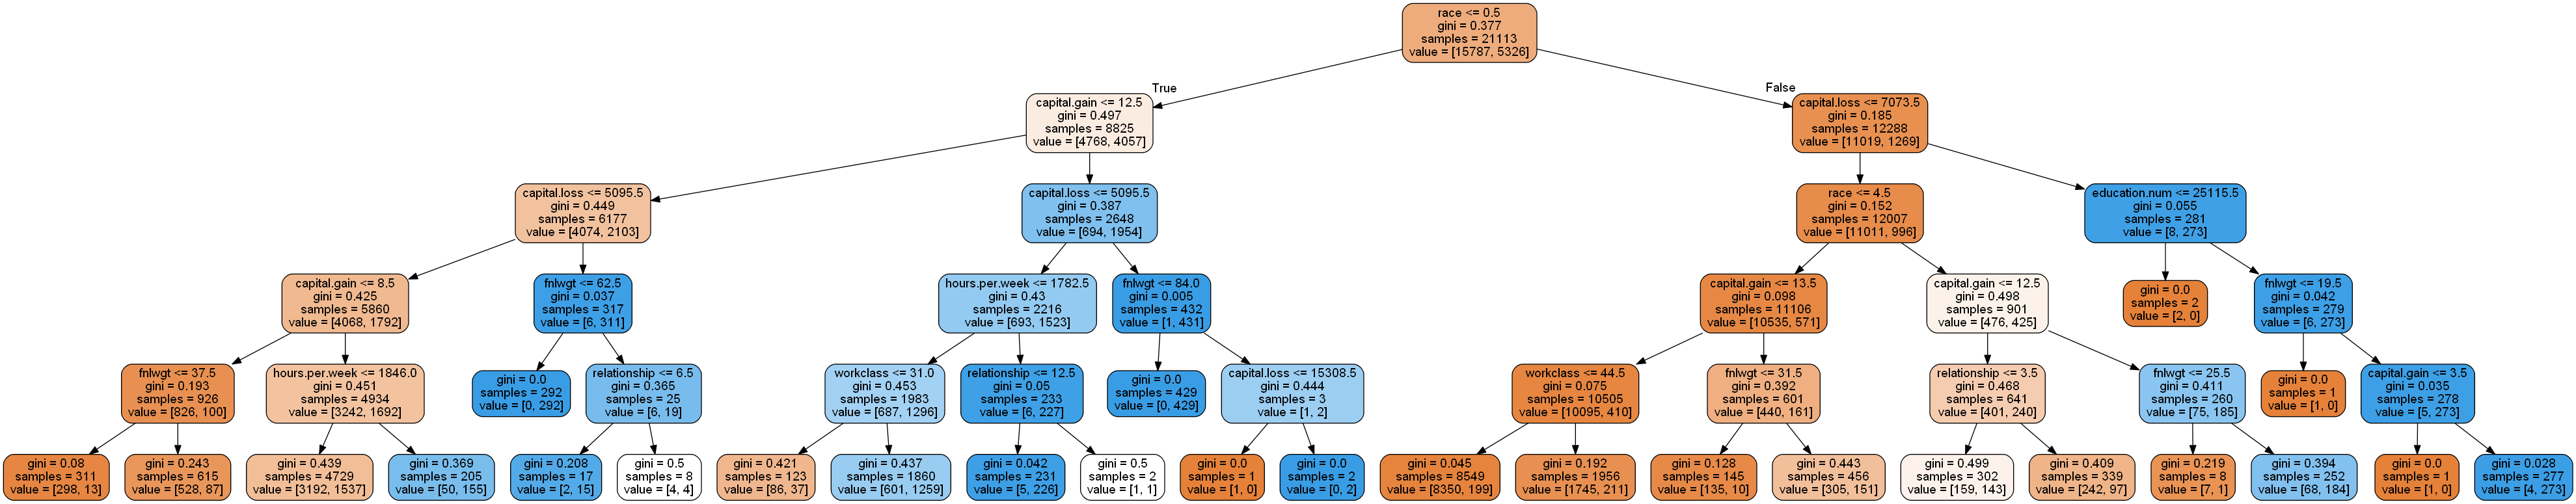

In [91]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Now we require to tune the hyperparameter as the default graph is complex.
 - Let us look into the parameters in Decision Tree
  - **criterion**
  - **splitter**
  - **max_features**
  - **max_depth**
  - **min_samples_split**
  - **min_samples_leaf**
  - **max_leaf_nodes**
  - **min_impurity_split**

 - Let's look at ***max_depth*** first -  the max_depth parameter denotes maximum depth of the tree.We will be creating trees between max depth of 1 to 40. Where staring from very bad model it will go upto a very perfect model on train data but there will be a cutoff point which will be showcase the optimum maximum depth and beyond which the accuracy will drop for test data

In [92]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [93]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.010914      0.003044         0.001209        0.000987   
1       0.016769      0.002304         0.000399        0.000798   
2       0.014789      0.001664         0.003126        0.006252   
3       0.029811      0.012726         0.000394        0.000788   
4       0.028117      0.006253         0.003125        0.006250   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.747810           0.747810   
1               2  {'max_depth': 2}           0.812219           0.818612   
2               3  {'max_depth': 3}           0.828558           0.834241   
3               4  {'max_depth': 4}           0.832583           0.840871   
4               5  {'max_depth': 5}           0.834241           0.844897   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.747573           0.747750  ...         0.747738        0.000087   
1           0.820507           0.825675  ...         0.819969        0.004538   
2           0.834478           0.836570  ...         0.834273        0.003115   
3           0.842529           0.842729  ...         0.840193        0.003860   
4           0.847265           0.842729  ...         0.843319        0.004858   

   rank_test_score  split0_train_score  split1_train_score  \
0               39            0.747721            0.747721   
1               16            0.821906            0.820308   
2               12            0.835998            0.834577   
3                9            0.841622            0.839491   
4                7            0.844287            0.844227   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.747780            0.747735            0.747735   
1            0.819834            0.818542            0.819253   
2            0.834458            0.833758            0.833758   
3            0.844997            0.838908            0.845421   
4            0.849319            0.841572            0.849683   

   mean_train_score  std_train_score  
0          0.747738         0.000022  
1          0.819969         0.001134  
2          0.834510         0.000819  
3          0.842088         0.002707  
4          0.845818         0.003165  

[5 rows x 21 columns]

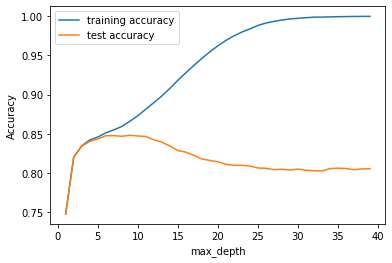

In [94]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


It can be clearly seen that optimum max depth would be 5.If we continue till 40, then traning set will reach upto 100 % accuracy with a clear overfit model where as test set accuracy significantly drops

***Min_samples_leaf:*** It tells the minimum no. of samples required to be present at a leaf

In [95]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)
tree.fit(X_train, y_train)
print(parameters)

{'min_samples_leaf': range(5, 200, 20)}


In [96]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.065914      0.008454         0.000798        0.000977   
1       0.058975      0.009550         0.001796        0.000399   
2       0.048869      0.001411         0.001796        0.000399   
3       0.046473      0.001344         0.003504        0.005570   
4       0.050814      0.008071         0.000797        0.000976   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.825716   
1                     25  {'min_samples_leaf': 25}           0.841819   
2                     45  {'min_samples_leaf': 45}           0.843003   
3                     65  {'min_samples_leaf': 65}           0.841108   
4                     85  {'min_samples_leaf': 85}           0.838030   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.827848           0.819560           0.826149  ...   
1           0.851291           0.839451           0.842018  ...   
2           0.849159           0.846555           0.851018  ...   
3           0.852711           0.845371           0.851492  ...   
4           0.849159           0.845371           0.851492  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.823616        0.003696               10            0.915335   
1         0.844788        0.004651                6            0.868028   
2         0.848293        0.003194                1            0.861042   
3         0.845830        0.005589                2            0.857549   
4         0.845214        0.004834                3            0.853108   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.911782            0.915335            0.912083   
1            0.869686            0.871226            0.867503   
2            0.860154            0.862581            0.860399   
3            0.855773            0.858555            0.855189   
4            0.853108            0.855654            0.854005   

   split4_train_score  mean_train_score  std_train_score  
0            0.913149          0.913537         0.001537  
1            0.869872          0.869263         0.001343  
2            0.863714          0.861578         0.001362  
3            0.858149          0.857043         0.001328  
4            0.854597          0.854095         0.000963  

[5 rows x 21 columns]

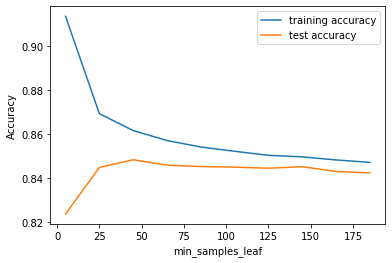

In [97]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


It can be seen that model is overfitted when min_sample_leaf is minimum.However, along with increase of this parameter, model accuracy gets stable

***min_samples_split:*** The hyperparameter min_samples_split is the minimum no. of samples required to split an internal node. Its default value is 2

In [98]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [99]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.071744      0.007262         0.003729        0.006061   
1       0.070678      0.020594         0.006656        0.007373   
2       0.068538      0.005838         0.000000        0.000000   
3       0.065152      0.001827         0.002188        0.001159   
4       0.066239      0.001840         0.002200        0.000397   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.811982   
1                      25  {'min_samples_split': 25}           0.825006   
2                      45  {'min_samples_split': 45}           0.835188   
3                      65  {'min_samples_split': 65}           0.839451   
4                      85  {'min_samples_split': 85}           0.846081   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.811035           0.818376           0.811701  ...   
1           0.825243           0.830215           0.822596  ...   
2           0.839687           0.830215           0.827333  ...   
3           0.845844           0.837556           0.833728  ...   
4           0.853895           0.838977           0.837281  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.812296        0.003296               10            0.969094   
1         0.826126        0.002581                9            0.906927   
2         0.834225        0.004783                8            0.890527   
3         0.840098        0.004360                7            0.883896   
4         0.844314        0.005898                6            0.877383   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.969331            0.969509            0.970458   
1            0.906513            0.906986            0.906577   
2            0.890053            0.889816            0.888521   
3            0.882238            0.883245            0.880765   
4            0.877442            0.879515            0.875081   

   split4_train_score  mean_train_score  std_train_score  
0            0.971227          0.969924         0.000800  
1            0.911847          0.907770         0.002047  
2            0.896335          0.891051         0.002725  
3            0.884258          0.882880         0.001261  
4            0.880706          0.878025         0.001940  

[5 rows x 21 columns]

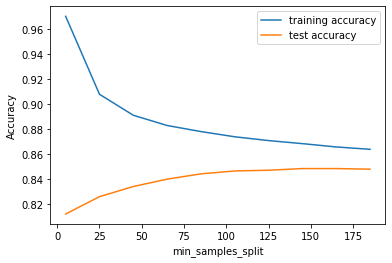

In [101]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The graph shows that overfitting reduced along with increased min_sample_split

Grid Search to Find Optimal Hyperparameters. Along with above mentioned three hyperparameters, we also ***criterion*** here. criterion defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.

In [103]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [104]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.026749      0.008221         0.003723        0.005995   
1        0.032368      0.003368         0.000997        0.001262   
2        0.031240      0.000004         0.000000        0.000000   
3        0.031246      0.000003         0.000000        0.000000   
4        0.049989      0.006232         0.000000        0.000000   
5        0.047514      0.001284         0.003124        0.006249   
6        0.049677      0.005608         0.000000        0.000000   
7        0.071262      0.038504         0.004127        0.003803   
8        0.031515      0.001739         0.001803        0.000385   
9        0.028730      0.001170         0.001588        0.000482   
10       0.030123      0.000401         0.001394        0.000489   
11       0.030306      0.001204         0.001800        0.000731   
12       0.051248      0.006856         0.001815        0.000388   
13       0.049679      0.007519         0.002188        0.000402   
14       0.048080      0.003294         0.001596        0.000489   
15       0.041461      0.003062         0.001586        0.000793   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.834241           0.843950           0.840398   
1            0.834241           0.843950           0.840398   
2            0.834241           0.842529           0.840398   
3            0.834241           0.842529           0.840398   
4            0.842529           0.851527           0.847265   
5            0.842529           0.851527           0.

In [106]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)


best accuracy 0.8510400232064759


In [107]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [108]:
# Best Model with prescibed  optimal hyperparameter obtained from grid search
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [109]:
# accuracy score
clf_gini.score(X_test,y_test)

0.850922753895458

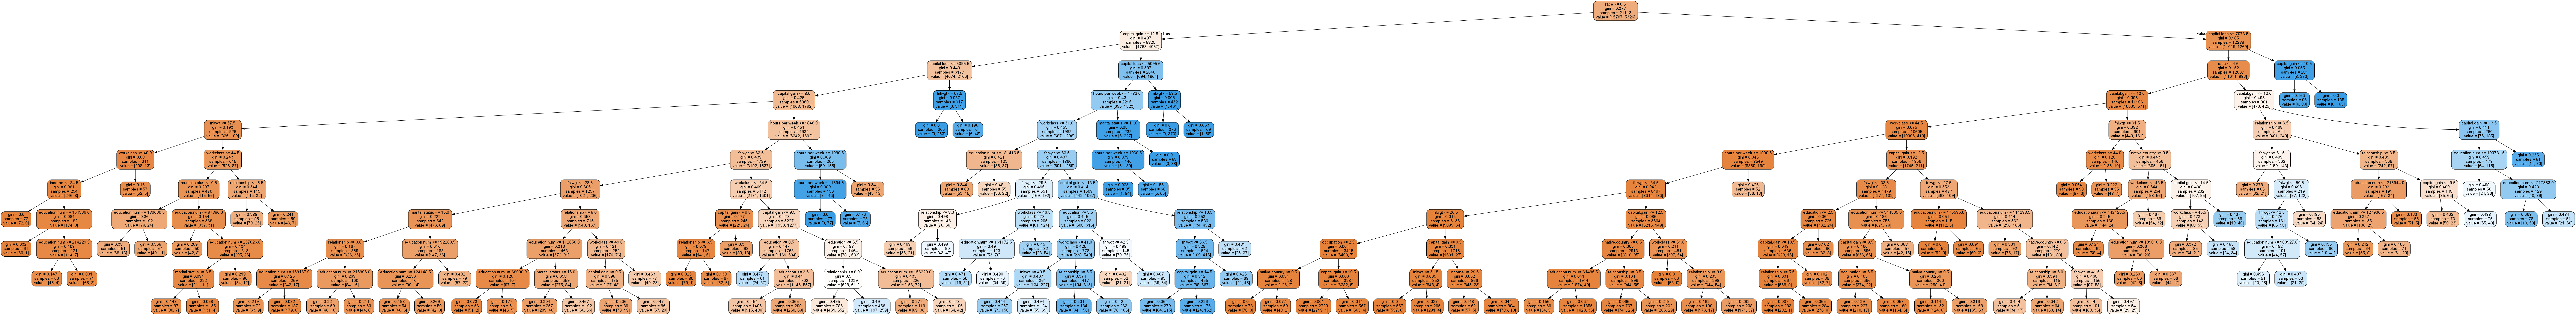

In [110]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

It can be seen that the model is too complex. Now let us reduce the max depth and process further

In [111]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8393192617968837


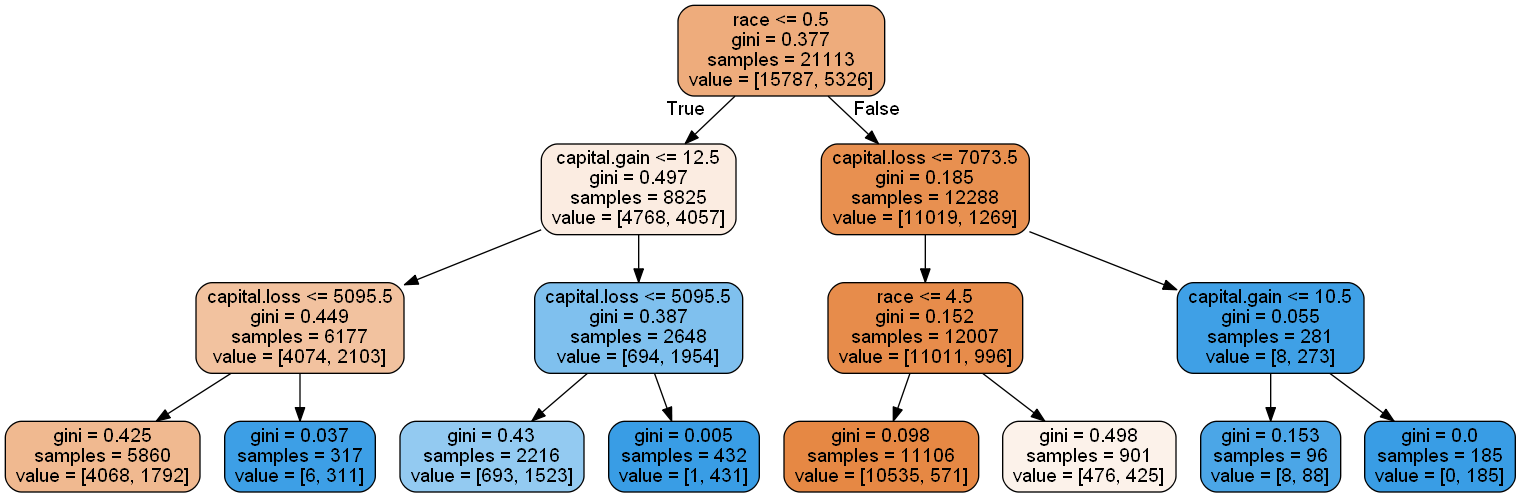

In [112]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [113]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049



In [114]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6564  303]
 [1151 1031]]
